# Connect to G-Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In Paid-Transaction sheet, Insert column after Last Name, name the new column as Full Name.

# Change the directory of Google Colab

In [ ]:
import os

In [ ]:
# file_dir, sesuaikan dengan lokasi dimana kamu taruh file "Homework - DataFrame.xlsx"
file_dir = "/content/drive/MyDrive/Colab Notebooks/Digital Skola/HomeWork_Week5/"
os.chdir(file_dir)

In [ ]:
# check file apa saja yang ada di current directory
!ls

 chart.png					'Net Revenue 2.xlsx'
'df_gabung_transaksi_konfirmasi Nov 2017.xlsx'	 question6_Group1.xlsx
 df_status_transaction.xlsx			 question6_Group2.xlsx
'Homework - DataFrame.xlsx'			 question8.xlsx
 HW_WEEK5_1.ipynb				 question9.xlsx


# Import Library

In [ ]:
import pandas as pd

## Load Datasets

# Question 1
In Paid-Transaction sheet, Insert column after Last Name, name the new column as Full Name.

In [ ]:
data_excel = pd.read_excel('Homework - DataFrame.xlsx', sheet_name='Paid-Transaction', skiprows=1)
df = pd.DataFrame(data_excel)
df  = df.drop(df.columns[0], axis=1)#haapus kolom index 1 karena tidak ada nilai

df.head()

,Paid Date,Order Number,First Name,Last Name,Meta Category,Product Name,Transaction Amount,Seller Discount,Sales Discount,Delivery Fee,Other Discount
0,20170724,201707240088517,elvride,aries,Babies/ Kids,Pineapple Hat Anak Ala Korea - 6M - 4Y - Unise...,300000,153000,10200.0,9000,0.0
1,20170701,201707018889790,BASIR,Ninuk,Service/ Mokado,Pulsa BOLT 150.000,287800,68000,0.0,0,0.0
2,20170707,201707079264675,Citra,Ardi,Service/ Mokado,"XTRA Combo 12X 6GB, 12bln",35000,0,700.0,0,0.0
3,20170720,201707209945714,Dian,Renaldi,Fashion,Square Foldable Travel Bag / Tas Koper Luggage...,85000,0,5900.0,0,0.0
4,20170722,201707220002354,rizal,Tamba,Gadget/ Komputer,Samsung Galaxy Note 5 Gold,81000,0,5600.0,0,0.0


In [ ]:
new_column = df.apply(lambda row: str(row['First Name']).capitalize() + '. ' + str(row['Last Name']).capitalize()[0], axis=1)
column_index = df.columns.get_loc('Last Name')+1
df.insert(loc=column_index, column='Full Name', value=new_column)


In [ ]:
df.filter(items=['First Name', 'Last Name', 'Full Name'])

,First Name,Last Name,Full Name
0,elvride,aries,Elvride. A
1,BASIR,Ninuk,Basir. N
2,Citra,Ardi,Citra. A
3,Dian,Renaldi,Dian. R
4,rizal,Tamba,Rizal. T
...,...,...,...
11995,Fitrah,gina,Fitrah. G
11996,Djebeng,Shinta,Djebeng. S
11997,Amik,Elan,Amik. E
11998,Anna,asih,Anna. A


# Question 2
In Paid-Transaction sheet, insert two columns next to Paid Date.


In [ ]:
#make column Paid Date 2
value_paid_date2 =  pd.to_datetime(df['Paid Date'], format='%Y%m%d').dt.strftime('%d-%b-%y')
df.insert(loc=df.columns.get_loc('Paid Date')+1, column='Paid Date 2', value=value_paid_date2)

#make column Paid Day
value_paid_day =  pd.to_datetime(df['Paid Date'], format='%Y%m%d').dt.strftime('%a')
df.insert(loc=df.columns.get_loc('Paid Date 2')+1, column='Paid Day', value=value_paid_day)


In [ ]:
df.loc[:,['Paid Date', 'Paid Date 2', 'Paid Day']]

,Paid Date,Paid Date 2,Paid Day
0,20170724,24-Jul-17,Mon
1,20170701,01-Jul-17,Sat
2,20170707,07-Jul-17,Fri
3,20170720,20-Jul-17,Thu
4,20170722,22-Jul-17,Sat
...,...,...,...
11995,20171201,01-Dec-17,Fri
11996,20171203,03-Dec-17,Sun
11997,20171204,04-Dec-17,Mon
11998,20171207,07-Dec-17,Thu


# Question 3
In Paid-Transaction sheet, Insert column after Seller Discount, name the new column as GMV

GMV is Gross Merchandise Value
GMV contains of Transaction amount substracts Seller Discount but includes Delivery Fee


In [ ]:
# insert column GMV
column_index = df.columns.get_loc('Seller Discount')+1
df.insert(column_index, column='GMV', value=df['Transaction Amount'] - df['Seller Discount'] + df['Delivery Fee'] )

In [ ]:
df.head()

,Paid Date,Paid Date 2,Paid Day,Order Number,First Name,Last Name,Full Name,Meta Category,Product Name,Transaction Amount,Seller Discount,GMV,Sales Discount,Delivery Fee,Other Discount
0,20170724,24-Jul-17,Mon,201707240088517,elvride,aries,Elvride. A,Babies/ Kids,Pineapple Hat Anak Ala Korea - 6M - 4Y - Unise...,300000,153000,156000,10200.0,9000,0.0
1,20170701,01-Jul-17,Sat,201707018889790,BASIR,Ninuk,Basir. N,Service/ Mokado,Pulsa BOLT 150.000,287800,68000,219800,0.0,0,0.0
2,20170707,07-Jul-17,Fri,201707079264675,Citra,Ardi,Citra. A,Service/ Mokado,"XTRA Combo 12X 6GB, 12bln",35000,0,35000,700.0,0,0.0
3,20170720,20-Jul-17,Thu,201707209945714,Dian,Renaldi,Dian. R,Fashion,Square Foldable Travel Bag / Tas Koper Luggage...,85000,0,85000,5900.0,0,0.0
4,20170722,22-Jul-17,Sat,201707220002354,rizal,Tamba,Rizal. T,Gadget/ Komputer,Samsung Galaxy Note 5 Gold,81000,0,81000,5600.0,0,0.0


# Question 4
In Paid-Transaction sheet, insert column 'Net Revenue'
Calculate Net Revenue for each transaction:
	Net Revenue = Transaction Fee Amount - Sales Discount - Other Discount

Transaction Fee reference is available on separate sheet.

In [ ]:
# panggil sheet Transaction Fee
data_excel_tf = pd.read_excel('Homework - DataFrame.xlsx', sheet_name='Transaction Fee',  skiprows=4)
df2 = pd.DataFrame(data_excel_tf)
df2  = df2.drop(df2.columns[0], axis=1)#haapus kolom index 1 karena tidak ada nilai
df2.head()


,Month,Meta Category,Transaction Fee Rate
0,201707,Home/ Food,0.070
1,201707,Gadget/ Komputer,0.030
2,201707,Fashion,0.090
3,201707,Babies/ Kids,0.034
4,201707,Beauty/ Health,0.082


In [ ]:
# Mengubah tipe data kolom 'date' menjadi string di sheet Paid-Transaction
df['Paid Date'] = df['Paid Date'].astype(str)
# Mengubah format kolom 'date' menjadi 'YYYYMM'  di sheet Paid-Transaction
df['Paid Date'] = df['Paid Date'].str[:6]
# Mengubah tipe data kolom 'date' menjadi string di sheet Transaction Fee
df2['Month'] = df2['Month'].astype(str)

In [ ]:
# join table Paid-Transaction dan Transaction Fee
merge_df= pd.merge(
    df.rename(columns={"Paid Date":"Month"}),
    df2,
    how = "outer",
    on  = ["Meta Category", "Month"]
)
merge_df.head()

,Month,Paid Date 2,Paid Day,Order Number,First Name,Last Name,Full Name,Meta Category,Product Name,Transaction Amount,Seller Discount,GMV,Sales Discount,Delivery Fee,Other Discount,Transaction Fee Rate
0,201707,24-Jul-17,Mon,201707240088517,elvride,aries,Elvride. A,Babies/ Kids,Pineapple Hat Anak Ala Korea - 6M - 4Y - Unise...,300000,153000,156000,10200.0,9000,0.0,0.034
1,201707,17-Jul-17,Mon,201707179808881,agungcahyo,Baby,Agungcahyo. B,Babies/ Kids,Baju Setelan Bayi / Baju Jumper Carter's 3in1 ...,299000,155000,144000,0.0,0,0.0,0.034
2,201707,12-Jul-17,Wed,201707099383764,Bzist,andy,Bzist. A,Babies/ Kids,PAKET ISI 2 - MAMYPOKO STANDAR XL26/XXL24,173800,8600,174200,0.0,9000,0.0,0.034
3,201707,03-Jul-17,Mon,201707039011111,Ihsan,erna,Ihsan. E,Babies/ Kids,Toylogy Mainan Anak Mobil Pemadam Kebakaran (F...,20200,1000,19200,1200.0,0,0.0,0.034
4,201707,26-Jul-17,Wed,201707260180957,Ardi,yenis,Ardi. Y,Babies/ Kids,Termurah Moby baby Moon Walk ( alat bantu Jala...,106000,30000,76000,0.0,0,0.0,0.034


In [ ]:
# Transaction Fee Amount = Transaction Fee Rate * Transaction Amount
merge_df['Transaction Fee Amount'] = merge_df['Transaction Fee Rate']*merge_df['Transaction Amount']
merge_df.head()

,Month,Paid Date 2,Paid Day,Order Number,First Name,Last Name,Full Name,Meta Category,Product Name,Transaction Amount,Seller Discount,GMV,Sales Discount,Delivery Fee,Other Discount,Transaction Fee Rate,Transaction Fee Amount
0,201707,24-Jul-17,Mon,201707240088517,elvride,aries,Elvride. A,Babies/ Kids,Pineapple Hat Anak Ala Korea - 6M - 4Y - Unise...,300000,153000,156000,10200.0,9000,0.0,0.034,10200.0
1,201707,17-Jul-17,Mon,201707179808881,agungcahyo,Baby,Agungcahyo. B,Babies/ Kids,Baju Setelan Bayi / Baju Jumper Carter's 3in1 ...,299000,155000,144000,0.0,0,0.0,0.034,10166.0
2,201707,12-Jul-17,Wed,201707099383764,Bzist,andy,Bzist. A,Babies/ Kids,PAKET ISI 2 - MAMYPOKO STANDAR XL26/XXL24,173800,8600,174200,0.0,9000,0.0,0.034,5909.2
3,201707,03-Jul-17,Mon,201707039011111,Ihsan,erna,Ihsan. E,Babies/ Kids,Toylogy Mainan Anak Mobil Pemadam Kebakaran (F...,20200,1000,19200,1200.0,0,0.0,0.034,686.8
4,201707,26-Jul-17,Wed,201707260180957,Ardi,yenis,Ardi. Y,Babies/ Kids,Termurah Moby baby Moon Walk ( alat bantu Jala...,106000,30000,76000,0.0,0,0.0,0.034,3604.0


In [ ]:
# In Paid-Transaction sheet, insert column 'Net Revenue'
# Calculate Net Revenue for each transaction:
# 	Net Revenue = Transaction Fee Amount - Sales Discount - Other Discount
merge_df['Net Revenue'] = merge_df['Transaction Fee Amount'] - merge_df['Sales Discount'] - merge_df['Other Discount']
merge_df.to_excel('Net Revenue 2.xlsx', index=False)

In [ ]:
#hasil akhir dengan penambahan kolom Net Revenue
df = merge_df

df.head()

,Month,Paid Date 2,Paid Day,Order Number,First Name,Last Name,Full Name,Meta Category,Product Name,Transaction Amount,Seller Discount,GMV,Sales Discount,Delivery Fee,Other Discount,Transaction Fee Rate,Transaction Fee Amount,Net Revenue
0,201707,24-Jul-17,Mon,201707240088517,elvride,aries,Elvride. A,Babies/ Kids,Pineapple Hat Anak Ala Korea - 6M - 4Y - Unise...,300000,153000,156000,10200.0,9000,0.0,0.034,10200.0,0.0
1,201707,17-Jul-17,Mon,201707179808881,agungcahyo,Baby,Agungcahyo. B,Babies/ Kids,Baju Setelan Bayi / Baju Jumper Carter's 3in1 ...,299000,155000,144000,0.0,0,0.0,0.034,10166.0,10166.0
2,201707,12-Jul-17,Wed,201707099383764,Bzist,andy,Bzist. A,Babies/ Kids,PAKET ISI 2 - MAMYPOKO STANDAR XL26/XXL24,173800,8600,174200,0.0,9000,0.0,0.034,5909.2,5909.2
3,201707,03-Jul-17,Mon,201707039011111,Ihsan,erna,Ihsan. E,Babies/ Kids,Toylogy Mainan Anak Mobil Pemadam Kebakaran (F...,20200,1000,19200,1200.0,0,0.0,0.034,686.8,-513.2
4,201707,26-Jul-17,Wed,201707260180957,Ardi,yenis,Ardi. Y,Babies/ Kids,Termurah Moby baby Moon Walk ( alat bantu Jala...,106000,30000,76000,0.0,0,0.0,0.034,3604.0,3604.0


# Question 5
Add new sheet, name it Question5. Add ONE chart
On primary axis, show monthly GMV figures using bar chart.
On secondary axis, plot monthly %Net Revenue as line chart.
%Net Revenue = Net Revenue / GMV

Did we do well in December 2017?

In [ ]:
# menghitung GMV bulanan ditampilan bar chart

# Konversi kolom 'date' menjadi tipe datetime
df['Paid Date 2'] = pd.to_datetime(df['Paid Date 2'])

# Tambahkan kolom 'Month' dengan informasi bulan dan 'Year'
df['Month'] = df['Paid Date 2'].dt.strftime("%b")
df['Year'] = df['Paid Date 2'].dt.year


# Define custom month order
month_order = ['Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']

# Sort the DataFrame by 'Month' column using custom order
monthly_gmv = df.groupby(['Month', 'Year'])['GMV'].sum().reset_index()
monthly_gmv['Month'] = pd.Categorical(monthly_gmv['Month'], categories=month_order, ordered=True)
monthly_gmv = monthly_gmv.sort_values('Month')

# Display the result
print(monthly_gmv)


  Month  Year        GMV
2   Jul  2017  378138400
0   Aug  2017  443389800
5   Sep  2017  455269100
4   Oct  2017  265146800
3   Nov  2017  589861400
1   Dec  2017  582788100


In [ ]:
# menghitung %Net Revenue bulanan ditampilan line chart
#%Net Revenue = Net Revenue / GMV
Net_Revenue_persent= df['Net Revenue']/df['GMV']
df['%Net_Revenue'] = Net_Revenue_persent

# Groupby kolom 'Month' dan 'Year' dan hitung %Net Revenue bulanan
monthly_net_rev = df.groupby(['Month', 'Year'])['%Net_Revenue'].sum().reset_index()

monthly_net_rev

,Month,Year,%Net_Revenue
0,Aug,2017,11.616504
1,Dec,2017,-2.015824
2,Jul,2017,56.002293
3,Nov,2017,37.077815
4,Oct,2017,13.394706
5,Sep,2017,115.588024


In [ ]:
# gabung hasil groupbye berupa monthly_gmv dan monthly_net_rev
merge_gmv_netR= pd.merge(
    monthly_gmv,
    monthly_net_rev,
    how = "outer",
    on  = ["Month", "Year"]
)
merge_gmv_netR

,Month,Year,GMV,%Net_Revenue
0,Jul,2017,378138400,56.002293
1,Aug,2017,443389800,11.616504
2,Sep,2017,455269100,115.588024
3,Oct,2017,265146800,13.394706
4,Nov,2017,589861400,37.077815
5,Dec,2017,582788100,-2.015824


<ipython-input-78-d2c7193f50c4>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(merge_gmv_netR.index, rotation=45)


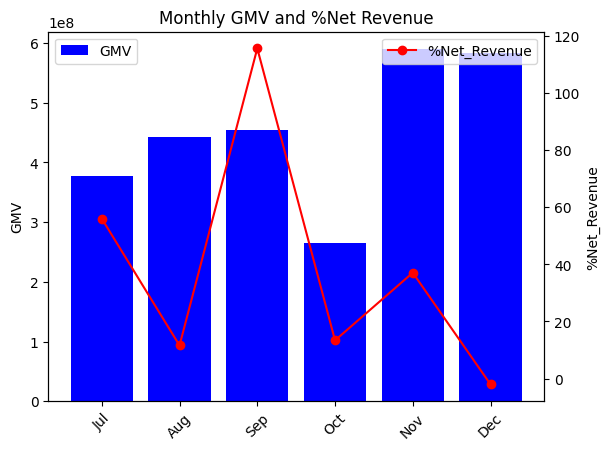

In [ ]:
#membuat diagram dari GMV dan %Net Revenue
import matplotlib.pyplot as plt

merge_gmv_netR.set_index('Month', inplace=True)#bulan sebagai index

#membuat grafik
fig, ax1 = plt.subplots()# subplot sumbu pertama(On primary axis)

#menampilkan GMV menggunakan bar chart
ax1.bar(merge_gmv_netR.index, merge_gmv_netR['GMV'], color='blue', label='GMV')
ax1.set_ylabel('GMV')

#memiringkan label month
ax1.set_xticklabels(merge_gmv_netR.index, rotation=45)


ax2 = ax1.twinx() # sumbu kedua
ax2.plot(merge_gmv_netR.index, merge_gmv_netR['%Net_Revenue'], color='red', marker='o', label='%Net_Revenue')
ax2.set_ylabel('%Net_Revenue')

#memberi label sumbu X
plt.xlabel('Month')

# menampilkan Legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

#menampilkan grafik
plt.title('Monthly GMV and %Net Revenue')
plt.savefig('chart.png')

# Menyimpan DataFrame dan diagram ke dalam file Excel
from openpyxl import Workbook
from openpyxl import load_workbook
from openpyxl.drawing.image import Image
from openpyxl.utils.dataframe import dataframe_to_rows

# Membuka file Excel yang sudah ada
workbook = load_workbook('Homework - DataFrame.xlsx')

# Membuat sheet baru dengan nama 'Question5'
worksheet = workbook.create_sheet('Question5')

# # Menyimpan data dari DataFrame ke worksheet
worksheet.append(['Month'] + merge_gmv_netR.columns.tolist())
for index, row in merge_gmv_netR.iterrows():
    worksheet.append([index] + row.tolist())

# Menyimpan diagram sebagai gambar ke worksheet
img = Image('chart.png')
worksheet.add_image(img, 'E1')

# Menyimpan file Excel
# workbook.save('Homework - DataFrame.xlsx') # jangan dijalankan terlebih dahulu agar tidak menambah sheet baru

# Menampilkan grafik
plt.show()


## Answers to the main question

Did we do well in December 2017?

- **Pada tahun 2017 bulan Desember, perusahaan ini dikatakan tidak mengelola dengan baik karena GMV tinggi namun %Net Revenue dibawah 0%. Artinya, jika %Net Revenue perusahaan berada di bawah 0%, itu menunjukkan bahwa biaya operasional dan pengeluaran melebihi pendapatan yang dihasilkan. Hal ini menunjukkan adanya kerugian finansial dan tidak berkelanjutan dalam jangka panjang. Walaupun GMV tinggi yang artinya menunjukkan tingkat penjualan yang tinggi atau aktivitas bisnis yang kuat, namun jika persentase pendapatan bersihnya negatif , maka perusahan tersebut tidak menghasilkan keuntungan.**


# Question 6

In a new sheet (Name Question6), create a pivot table, do this grouping:

1. Group 1:
- Home/ Food
- Sports/ Hobi/ Otomotif
- Fashion
- Beauty/ Health

2. Group 2:
- Gadget/ Komputer
- Elektronik
- Service/ Mokado
- Babies/ Kids


Show monthly %Net Revenue for each group. In December 2017, how do these two groups compare? (Put your answer in sheet Question6)

In [ ]:
df.head()

,Month,Paid Date 2,Paid Day,Order Number,First Name,Last Name,Full Name,Meta Category,Product Name,Transaction Amount,Seller Discount,GMV,Sales Discount,Delivery Fee,Other Discount,Transaction Fee Rate,Transaction Fee Amount,Net Revenue,Year,%Net_Revenue
0,Jul,2017-07-24,Mon,201707240088517,elvride,aries,Elvride. A,Babies/ Kids,Pineapple Hat Anak Ala Korea - 6M - 4Y - Unise...,300000,153000,156000,10200.0,9000,0.0,0.034,10200.0,0.0,2017,0.000000
1,Jul,2017-07-17,Mon,201707179808881,agungcahyo,Baby,Agungcahyo. B,Babies/ Kids,Baju Setelan Bayi / Baju Jumper Carter's 3in1 ...,299000,155000,144000,0.0,0,0.0,0.034,10166.0,10166.0,2017,0.070597
2,Jul,2017-07-12,Wed,201707099383764,Bzist,andy,Bzist. A,Babies/ Kids,PAKET ISI 2 - MAMYPOKO STANDAR XL26/XXL24,173800,8600,174200,0.0,9000,0.0,0.034,5909.2,5909.2,2017,0.033922
3,Jul,2017-07-03,Mon,201707039011111,Ihsan,erna,Ihsan. E,Babies/ Kids,Toylogy Mainan Anak Mobil Pemadam Kebakaran (F...,20200,1000,19200,1200.0,0,0.0,0.034,686.8,-513.2,2017,-0.026729
4,Jul,2017-07-26,Wed,201707260180957,Ardi,yenis,Ardi. Y,Babies/ Kids,Termurah Moby baby Moon Walk ( alat bantu Jala...,106000,30000,76000,0.0,0,0.0,0.034,3604.0,3604.0,2017,0.047421


In [ ]:
pivot_tabel = pd.pivot_table(
    data       = df,
    index      = ["Meta Category"],
    values     = ['%Net_Revenue'],
    columns    = ["Month"],
    aggfunc    = "sum"
)
pivot_tabel

%Net_Revenue                                   \
Month                           Aug        Dec        Jul        Nov   
Meta Category                                                          
Babies/ Kids               1.265506   0.756282   3.029538   1.013684   
Beauty/ Health            16.313008   8.943665  24.106530  15.736213   
Elektronik                -0.134325  -0.373734  -0.195008  -0.771234   
Fashion                   24.274792  14.980107  30.162601  33.177269   
Gadget/ Komputer           1.638122   0.403572   4.435893  -1.330482   
Home/ Food                 9.638964   7.191656  13.605005  10.264396   
Service/ Mokado          -42.005744 -34.691067 -22.502092 -23.766819   
Sports/ Hobi/ Otomotif     0.626180   0.773696   3.359825   2.754787   

                                              
Month                         Oct        Sep  
Meta Category                                 
Babies/ Kids             0.472566   4.841399  
Beauty/ Health          12.844865  33.328318  
Elektronik              -0.651961  -0.257760  
Fashion                 25.164210  59.726728  
Gadget/ Komputer        -0.636080   6.097880  
Home/ Food               4.930405  20.353336  
Service/ Mokado        -29.362349 -17.209150  
Sports/ Hobi/ Otomotif   0.633050   8.707272

## Group 1

In [ ]:
# Data for filtering
filter_data1 = {
      'Group 1': ['Home/ Food','Sports/ Hobi/ Otomotif','Fashion','Beauty/ Health'],
}

df_kategori1 = pd.DataFrame(filter_data1)
merged_df1 = pivot_tabel.join(df_kategori1.set_index('Group 1'), how='inner')# Join the pivot table and df_kategori based on the 'Meta Category' column


# Define custom sort order for the index (Group 1)
merged_df1.index = pd.Categorical(merged_df1.index, categories=df_kategori1['Group 1'], ordered=True)

# Sort the DataFrame by the custom index order
sorted_df = merged_df1.sort_index()

sorted_df.to_excel('question6_Group1.xlsx', index=True)
print('Group 2')
sorted_df


Group 2


<ipython-input-81-818b5f52e287>:7: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left, 1 on the right)
  merged_df1 = pivot_tabel.join(df_kategori1.set_index('Group 1'), how='inner')# Join the pivot table and df_kategori based on the 'Meta Category' column


%Net_Revenue                                   \
Month                           Aug        Dec        Jul        Nov   
Home/ Food                 9.638964   7.191656  13.605005  10.264396   
Sports/ Hobi/ Otomotif     0.626180   0.773696   3.359825   2.754787   
Fashion                   24.274792  14.980107  30.162601  33.177269   
Beauty/ Health            16.313008   8.943665  24.106530  15.736213   

                                              
Month                         Oct        Sep  
Home/ Food               4.930405  20.353336  
Sports/ Hobi/ Otomotif   0.633050   8.707272  
Fashion                 25.164210  59.726728  
Beauty/ Health          12.844865  33.328318

## Group 2

In [ ]:
# Data for filtering
filter_data2 = {
      'Group 2': ['Gadget/ Komputer', 'Elektronik', 'Service/ Mokado', 'Babies/ Kids'],
}

df_kategori2 = pd.DataFrame(filter_data2)
merged_df2 = pivot_tabel.join(df_kategori2.set_index('Group 2'), how='inner')# Join the pivot table and df_kategori based on the 'Meta Category' column

# Define custom sort order for the index (Group 2)
merged_df2.index = pd.Categorical(merged_df2.index, categories=df_kategori2['Group 2'], ordered=True)

# Sort the DataFrame by the custom index order
sorted_df2 = merged_df2.sort_index()

sorted_df2.to_excel('question6_Group2.xlsx', index=True)
print('Group 2')
sorted_df2

Group 2


<ipython-input-82-2d698f7956b9>:7: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left, 1 on the right)
  merged_df2 = pivot_tabel.join(df_kategori2.set_index('Group 2'), how='inner')# Join the pivot table and df_kategori based on the 'Meta Category' column


%Net_Revenue                                              \
Month                     Aug        Dec        Jul        Nov        Oct   
Gadget/ Komputer     1.638122   0.403572   4.435893  -1.330482  -0.636080   
Elektronik          -0.134325  -0.373734  -0.195008  -0.771234  -0.651961   
Service/ Mokado    -42.005744 -34.691067 -22.502092 -23.766819 -29.362349   
Babies/ Kids         1.265506   0.756282   3.029538   1.013684   0.472566   

                             
Month                   Sep  
Gadget/ Komputer   6.097880  
Elektronik        -0.257760  
Service/ Mokado  -17.209150  
Babies/ Kids       4.841399

## Answers to the main question

Show monthly %Net Revenue for each group. In December 2017, how do these two groups compare?

- Dilihat dari tabel, jelas bahwa Group **1** memberikan %Net Revenue yang **baik/positif** untuk tiap bulannya.

- Sebaliknya, Group **2** memberikan %Net Revenue yang **buruk/negatif** untuk tiap bulannya.

# Question 7
1. Which Seller generated highest GMV in August 2017?

2. In Meta Category 'Fashion', which Seller had highest number of transaction in September 2017?

## No 1

In [ ]:
# panggil sheet Seller
data_excel_seller = pd.read_excel('Homework - DataFrame.xlsx', sheet_name='Seller',  skiprows=1)
df_seller = pd.DataFrame(data_excel_seller)
df_seller  = df_seller.drop(df_seller.columns[0], axis=1)#haapus kolom index 1 karena tidak ada nilai
df_seller


,Order Number,Seller
0,201707209929420,Global Phone
1,201707129550097,E-shop
2,201707039056021,twelven com
3,201707099376522,GRAMEDIA
4,201707028956707,E-Bold
...,...,...
11995,201712042733301,E-Bold
11996,201711292684084,Luckykorea88
11997,201712072774578,GAU SHOP
11998,201712032722038,Farida Toko


In [ ]:
df['Paid Date 2'] = pd.to_datetime(df['Paid Date 2'])
aug_2017_data = df[(df['Paid Date 2'].dt.month == 8) & (df['Paid Date 2'].dt.year == 2017)]
aug_2017_data

# Menemukan penjual dengan GMV tertinggi pada Agustus 2017
highest_GMV_aug_2017_data = aug_2017_data.loc[aug_2017_data['GMV'].idxmax()]
highest_GMV_aug_2017_data

Month                                     Aug
Paid Date 2               2017-08-28 00:00:00
Paid Day                                  Mon
Order Number                  201708281180810
First Name                             PETRUS
Last Name                               sinda
Full Name                           Petrus. S
Meta Category                 Service/ Mokado
Product Name                Indosat REG 25000
Transaction Amount                   19990000
Seller Discount                       1500000
GMV                                  18500000
Sales Discount                      1451400.0
Delivery Fee                            10000
Other Discount                            0.0
Transaction Fee Rate                    0.005
Transaction Fee Amount                99950.0
Net Revenue                        -1351450.0
Year                                     2017
%Net_Revenue                        -0.073051
Name: 2972, dtype: object

In [ ]:
# gabung kan dengan tabel Seller untuk mencari seller yang memiiki penjualan tertinggi highest_GMV_aug_2017_data
seller_highest_GMV_aug_2017_data=df_seller.loc[df_seller['Order Number'] == highest_GMV_aug_2017_data['Order Number'], 'Seller']
print("Penjual dengan order number tertinggi:",seller_highest_GMV_aug_2017_data.values[0])

Penjual dengan order number tertinggi: MOBILEPULSA APP


Answer 1:
- Di bulan Agustus 2017, **MOBILEPULSA APP** adalah seller dengan GMV tertinggi

- Dengan nilai GMV sekitar **18500000** Juta

## No 2

In Meta Category 'Fashion', which Seller had highest number of transaction in September 2017?

In [ ]:
sep_2017_fashion_data = df[(df['Paid Date 2'].dt.month == 9) & (df['Paid Date 2'].dt.year == 2017)& (df['Meta Category']=='Fashion') ]
sep_2017_fashion_data
# Menemukan penjual dengan GMV tertinggi pada Agustus 2017
highest_TA_sep_2017_fashion_data = sep_2017_fashion_data.loc[sep_2017_fashion_data['Transaction Amount'].idxmax()]
highest_TA_sep_2017_fashion_data

Month                                                                   Sep
Paid Date 2                                             2017-09-24 00:00:00
Paid Day                                                                Sun
Order Number                                                201709241729475
First Name                                                            indra
Last Name                                                             henny
Full Name                                                          Indra. H
Meta Category                                                       Fashion
Product Name              VARKA Sepatu Sneakers Unisex VEL / Size 36-43 ...
Transaction Amount                                                 18007500
Seller Discount                                                           0
GMV                                                                18007500
Sales Discount                                                    1071300.0
Delivery Fee

In [ ]:

# gabung kan dengan tabel Seller untuk mencari seller yang memiiki penjualan tertinggi highest_GMV_aug_2017_data
seller_highest_TA_sep_2017_data=df_seller.loc[df_seller['Order Number'] == highest_TA_sep_2017_fashion_data['Order Number'], 'Seller']
print("Penjual dengan order number tertinggi:",seller_highest_TA_sep_2017_data.values[0])

Penjual dengan order number tertinggi: Distro Bandung .Inc


Penjual dengan transaksi terbanyak di Sept 2017 pada category "Fashion" adalah: **Distro Bandung .Inc**	dengan **18007500** Transaksi terkonfirmasi

# Question 8
Show the minimum, maximum and average number of days taken from payment to confirmation
by Meta Category for Orders Paid in November 2017
(beware, not all transactions are confirmed)

In [ ]:
# panggil sheet Confirmed-Transaction
data_excel_CT = pd.read_excel('Homework - DataFrame.xlsx', sheet_name='Confirmed-Transaction',  skiprows=4)
df_confirmed_transaction = pd.DataFrame(data_excel_CT)
df_confirmed_transaction  = df_confirmed_transaction.drop(df_confirmed_transaction.columns[0], axis=1)#haapus kolom index 1 karena tidak ada nilai
df_confirmed_transaction

,Order Number,Purchase Confirmation Date
0,201707240088517,20170727
1,201707018889790,20170701
2,201707079264675,20170707
3,201707209945714,20170722
4,201707220002354,20170802
...,...,...
11021,201712052749535,20171205
11022,201712082793577,20171208
11023,201712102815768,20171210
11024,201712052758277,20171209


In [ ]:
# Ambil semua transaksi november 2017
df['Paid Date 2'] = pd.to_datetime(df['Paid Date 2'])
nov_2017_data = df[(df['Paid Date 2'].dt.month == 11) & (df['Paid Date 2'].dt.year == 2017)]
nov_2017_data.head()

,Month,Paid Date 2,Paid Day,Order Number,First Name,Last Name,Full Name,Meta Category,Product Name,Transaction Amount,Seller Discount,GMV,Sales Discount,Delivery Fee,Other Discount,Transaction Fee Rate,Transaction Fee Amount,Net Revenue,Year,%Net_Revenue
8000,Nov,2017-11-03,Fri,201711032320144,risma,deanismar,Risma. D,Fashion,Kalung Etnik dari Kayu by Dilla Aksesoris medan,54300,0,54300,5300.0,0,0.0,0.087,4724.1,-575.9,2017,-0.010606
8001,Nov,2017-11-23,Thu,201711232606740,anton,esta,Anton. E,Fashion,Tas Sepatu Travel| Shoe Organizer| 5 Warna,54300,0,54300,5300.0,0,0.0,0.087,4724.1,-575.9,2017,-0.010606
8002,Nov,2017-11-11,Sat,201711102424366,Felita,AryGunawan,Felita. A,Fashion,Kemeja Jumbo Polos Bahan katun Rayon XXL,54300,0,54300,5300.0,0,0.0,0.087,4724.1,-575.9,2017,-0.010606
8003,Nov,2017-11-14,Tue,201711112449847,wiraryanta,Imam,Wiraryanta. I,Fashion,Tas Sepatu Travel| Shoe Organizer| 5 Warna,54300,0,54300,6800.0,0,0.0,0.087,4724.1,-2075.9,2017,-0.038230
8004,Nov,2017-11-23,Thu,201711232597456,Novianna,pricilla,Novianna. P,Fashion,YEAR END SALE | XS-4XL | NO KW | Branded TOPS ...,54300,0,54300,6800.0,0,0.0,0.087,4724.1,-2075.9,2017,-0.038230


In [ ]:
# Tabel gabungan transaksi dan konfirmasi
df_gabung_transaksi_konfirmasi = pd.merge(nov_2017_data, df_confirmed_transaction, on='Order Number')
# df_gabung_transaksi_konfirmasi.to_excel('df_gabung_transaksi_konfirmasi.xlsx', index=False)

In [ ]:
# ubah format tanggal 'Purchase Confirmation Date'
value_paid_date3 =  pd.to_datetime(df_gabung_transaksi_konfirmasi['Purchase Confirmation Date'], format='%Y%m%d').dt.strftime('%Y-%m-%d')
df_gabung_transaksi_konfirmasi.insert(loc=df_gabung_transaksi_konfirmasi.columns.get_loc('Purchase Confirmation Date')+1, column='Purchase Confirmation Date 2', value=value_paid_date3)

In [ ]:

# Menghitung selisih hari antara tanggal pembayaran dan tanggal konfirmasi
df_gabung_transaksi_konfirmasi['Days Taken'] = pd.to_datetime(df_gabung_transaksi_konfirmasi['Purchase Confirmation Date 2']) - pd.to_datetime(df_gabung_transaksi_konfirmasi['Paid Date 2'])
df_gabung_transaksi_konfirmasi['Days Taken'] = df_gabung_transaksi_konfirmasi['Days Taken'].dt.days
df_gabung_transaksi_konfirmasi.to_excel('df_gabung_transaksi_konfirmasi Nov 2017.xlsx',index=False)

In [ ]:
# Group the data by Meta Category and calculate statistics
statistics = df_gabung_transaksi_konfirmasi.groupby('Meta Category')['Days Taken'].agg(['min', 'max', 'mean'])

#sort
# Define custom month order
categories_idx = ['Home/ Food', 'Gadget/ Komputer', 'Fashion', 'Babies/ Kids', 'Beauty/ Health', 'Sports/ Hobi/ Otomotif', 'Elektronik', 'Service/ Mokado']


# Define custom sort order for the index (Group 1)
statistics.index = pd.Categorical(statistics.index, categories=categories_idx, ordered=True)

# Sort the DataFrame by the custom index order
statistics_idx_sort = statistics.sort_index()

statistics_idx_sort.to_excel('question8.xlsx',index=True)
statistics_idx_sort

,min,max,mean
Home/ Food,1,31,7.788991
Gadget/ Komputer,1,36,6.811594
Fashion,1,35,6.601382
Babies/ Kids,1,24,7.823529
Beauty/ Health,1,21,6.543269
Sports/ Hobi/ Otomotif,1,18,6.346667
Elektronik,0,11,5.666667
Service/ Mokado,0,6,0.089802


# Question 9
Not all paid transactions are processed. Some are cancelled due to various reasons.
Calculate %Confirmed Trx and % Cancelled Trx on monthly basis


In [ ]:
# panggil sheet Cancelled-Transaction
data_excel_Cancel = pd.read_excel('Homework - DataFrame.xlsx', sheet_name='Cancelled-Transaction',  skiprows=1)
df_cancelled_transaction = pd.DataFrame(data_excel_Cancel)
df_cancelled_transaction  = df_cancelled_transaction.drop(df_cancelled_transaction.columns[0], axis=1)#haapus kolom index 1 karena tidak ada nilai

df_cancelled_transaction.insert(len(df_cancelled_transaction.columns),'Status',value='Cancel')
df_confirmed_transaction.insert(len(df_confirmed_transaction.columns),'Status',value='Confirm')


In [ ]:
df.insert(len(df.columns),'Status',value=0)

In [ ]:
# Mengisi kolom "Status" dalam DataFrame transaksi berdasarkan DataFrame konfirmasi dan pembatalan
df['Status'] = df['Order Number'].map(df_confirmed_transaction.set_index('Order Number')['Status'].combine_first(df_cancelled_transaction.set_index('Order Number')['Status']))
df.to_excel('df_status_transaction.xlsx', index=False)

In [ ]:
# Menghitung jumlah transaksi yang dikonfirmasi dan dibatalkan setiap bulan
summary = df.groupby('Month')['Status'].value_counts().unstack().fillna(0)

# Menghitung persentase transaksi yang dikonfirmasi dan dibatalkan setiap bulan
summary['Paid Trx'] =  summary['Confirm'] + summary['Cancel']
summary['%Confirmed Trx'] = (summary['Confirm'] / (summary['Confirm'] + summary['Cancel'])) * 100
summary['%Canceled Trx'] = (summary['Cancel'] / (summary['Confirm'] + summary['Cancel'])) * 100
summary = pd.DataFrame(summary)

# Define custom month order
month_order = ['Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']

# Define custom sort order for the index (Group 1)
summary.index = pd.Categorical(summary.index, categories=month_order, ordered=True)

# Sort the DataFrame by the custom index order
summary_idx_sort = summary.sort_index()

summary_idx_sort.to_excel('question9.xlsx',index=True)
summary_idx_sort.iloc[:, 2:]

Status,Paid Trx,%Confirmed Trx,%Canceled Trx
Jul,2000,94.40,5.60
Aug,2000,94.60,5.40
Sep,2000,90.65,9.35
Oct,2000,91.00,9.00
Nov,2000,91.95,8.05
Dec,2000,88.70,11.30


# Question 10
From October to December 2017, which stakeholder had highest cancelled GMV? And what was the main reason?
Put your answer here


In [ ]:
# Ambil semua transaksi Oktober sampai Desember
df['Paid Date 2'] = pd.to_datetime(df['Paid Date 2'])
okt_sampai_des_2017_data = df[(df['Paid Date 2'].dt.month >= 10) & (df['Paid Date 2'].dt.year == 2017)]
okt_sampai_des_2017_data.head()

,Month,Paid Date 2,Paid Day,Order Number,First Name,Last Name,Full Name,Meta Category,Product Name,Transaction Amount,...,GMV,Sales Discount,Delivery Fee,Other Discount,Transaction Fee Rate,Transaction Fee Amount,Net Revenue,Year,%Net_Revenue,Status
6000,Oct,2017-10-12,Thu,201710122024157,mulyanto,Nurul,Mulyanto. N,Babies/ Kids,Jaket Hoodie Anak - Unisex - 4 tahun - 10 tahu...,35000,...,36500,200.0,10000,0.0,0.038,1330.0,1130.0,2017,0.030959,Confirm
6001,Oct,2017-10-19,Thu,201710192128062,I,ridwandarmawan,I. R,Babies/ Kids,Jaket Hoodie Anak - Unisex - 4 tahun - 10 tahu...,20000,...,15900,600.0,0,0.0,0.038,760.0,160.0,2017,0.010063,Confirm
6002,Oct,2017-10-11,Wed,201710081949352,Restina,Riskyk,Restina. R,Babies/ Kids,MOON WALK BABY MOON/ALAT BANTU BABY BERJALAN,150000,...,59000,1100.0,0,0.0,0.038,5700.0,4600.0,2017,0.077966,Confirm
6003,Oct,2017-10-30,Mon,201710272235719,Meyli,Wibowo,Meyli. W,Babies/ Kids,LIBBY SLEEPSUIT PREMIUM FANYBABY GIRL 3-6,147900,...,157900,2900.0,10000,0.0,0.038,5620.2,2720.2,2017,0.017227,Cancel
6004,Oct,2017-10-11,Wed,201710112007757,oki,Gustaf,Oki. G,Babies/ Kids,Vitabumin Madu Ikan Gabus 130ml (Kemasan Baru),233000,...,233000,0.0,0,0.0,0.038,8854.0,8854.0,2017,0.038000,Confirm


In [ ]:
# Tabel gabungan transaksi dan cancelled
df_gabung_transaksi_cancel = pd.merge(okt_sampai_des_2017_data, df_cancelled_transaction, on='Order Number')
df_gabung_transaksi_cancel.head()

,Month,Paid Date 2,Paid Day,Order Number,First Name,Last Name,Full Name,Meta Category,Product Name,Transaction Amount,...,Other Discount,Transaction Fee Rate,Transaction Fee Amount,Net Revenue,Year,%Net_Revenue,Status_x,Cancel Stakeholder,Cancel Reason,Status_y
0,Oct,2017-10-30,Mon,201710272235719,Meyli,Wibowo,Meyli. W,Babies/ Kids,LIBBY SLEEPSUIT PREMIUM FANYBABY GIRL 3-6,147900,...,0.0,0.038,5620.2,2720.2,2017,0.017227,Cancel,Seller,No response from seller,Cancel
1,Oct,2017-10-14,Sat,201710132035293,san,Raya,San. R,Babies/ Kids,Baju Renang Anak Perempuan Karakter - 1 tahun ...,120000,...,0.0,0.038,4560.0,-15440.0,2017,-0.119690,Cancel,Seller,No response from seller,Cancel
2,Oct,2017-10-31,Tue,201710312280768,Thomas,Nurul,Thomas. N,Babies/ Kids,Set Gift Set Bayi isi 3 pcs - Unisex - Newborn...,150000,...,0.0,0.038,5700.0,100.0,2017,0.001250,Cancel,Buyer,Get lower price,Cancel
3,Oct,2017-10-27,Fri,201710272231571,siti,adi,Siti. A,Babies/ Kids,Tas Anak Sekolah Transformers TGB 8285,297000,...,0.0,0.038,11286.0,-9314.0,2017,-0.031360,Cancel,Seller,Sold out,Cancel
4,Oct,2017-10-20,Fri,201710172098608,Darul,Tri,Darul. T,Babies/ Kids,SEP024 - Gold Shoes Pita Hitam,249000,...,0.0,0.038,9462.0,9462.0,2017,0.242615,Cancel,Seller,No response from seller,Cancel


In [ ]:
# Filter data untuk menyertakan hanya transaksi yang dibatalkan
cancelled_transactions = df_gabung_transaksi_cancel

# Kelompokkan data berdasarkan pemangku kepentingan dan hitung total GMV yang dibatalkan untuk setiap pemangku kepentingan
cancelled_gmv_by_stakeholder = cancelled_transactions.groupby('Cancel Stakeholder')['GMV'].sum()
cancelled_gmv_by_stakeholder

Cancel Stakeholder
Buyer     20426800
Seller    84885300
System    24355800
Name: GMV, dtype: int64

In [ ]:
# Temukan pemangku kepentingan dengan jumlah GMV yang dibatalkan tertinggi
highest_cancelled_gmv_stakeholder = cancelled_gmv_by_stakeholder.idxmax()

# Filter data untuk menyertakan hanya transaksi dari pemangku kepentingan dengan GMV tertinggi yang dibatalkan
highest_cancelled_gmv_transactions = cancelled_transactions[cancelled_transactions['Cancel Stakeholder'] == highest_cancelled_gmv_stakeholder]

# Tentukan alasan utama pembatalan dengan mencari alasan pembatalan yang paling sering
main_cancellation_reason = highest_cancelled_gmv_transactions['Cancel Reason'].mode().iloc[0]

print("Stakeholder with the highest cancelled GMV:", highest_cancelled_gmv_stakeholder)
print("Main reason for cancellation:", main_cancellation_reason)


Stakeholder with the highest cancelled GMV: Seller
Main reason for cancellation: No response from seller


Answer:
1. Stakeholder who had highest cancelled GMV is **Seller**

2. The main reason is **No response from seller**